In [ ]:
# from zipfile import ZipFile
# with ZipFile('ndvi_images2.zip', 'r') as zipObj:
#    zipObj.extractall()
# import json

In [ ]:
import time
import functools
def timer(original_func):
  @functools.wraps(original_func)
  def wrapper(*args, **kwargs):
    start = time.perf_counter()
    value = original_func(*args, **kwargs)
    end = time.perf_counter()
    print(f"Exec time of {original_func.__name__} function is {round(end-start, 3)} s")
    return value
  return wrapper

In [ ]:
import folium
import shapely.geometry
from matplotlib import pyplot as plt
import json

def convert_bounds(bbox, invert_y=False):
    """
    Helper method for changing bounding box representation to leaflet notation

    ``(lon1, lat1, lon2, lat2) -> ((lat1, lon1), (lat2, lon2))``
    """
    x1, y1, x2, y2 = bbox
    if invert_y:
        y1, y2 = y2, y1
    return ((y1, x1), (y2, x2))

@timer
def visualize():
  map = folium.Map()
  with open("meta.json", encoding = 'utf-8') as f:
    data = json.loads(f.read())
  for i, im in enumerate(data):
    bbox = im.get('bbox')
    folium.GeoJson(
      shapely.geometry.box(*bbox),
      style_function=lambda x: dict(fill=True, weight=2, opacity=0.8, color="blue"),
      name=f"Query_{i}",
    ).add_to(map)


  # Image bounds are specified in Lat/Lon order with Lat axis inversed
    image_bounds = convert_bounds(bbox, invert_y=True)
    img = plt.imread(im.get('filename'), format='jpg')
    img_ovr = folium.raster_layers.ImageOverlay(
            name=f"NDVI_{i}",
            image=img,
            bounds=image_bounds,
            opacity=0.9,
            interactive=True,
            cross_origin=False,
            zindex=1,
    )
    img_ovr.add_to(map)
    map.fit_bounds(bounds=image_bounds)
    # print("Bounds: ", image_bounds)

  folium.LayerControl().add_to(map)
  return map

In [ ]:
# visualize()

In [ ]:
import requests
from zipfile import ZipFile

# @timer
def download():
  ip = "128.110.223.2"
  url=f'http://{ip}:81/ndvi'
  computationURL=f'http://{ip}'
  nodes=4
  dataRepositoryURL='https://earth-search.aws.element84.com/v0/'
  date_range='2022-03-01/2022-03-07'
  coordinates = [[[
              43.17626953125,
              39.70718665682654
            ],
            [
              46.153564453125,
              39.70718665682654
            ],
            [
              46.153564453125,
              41.36856413680967
            ],
            [
              43.17626953125,
              41.36856413680967
            ],
            [
              43.17626953125,
              39.70718665682654
            ]
          ]
        ]
  myobj={'computationURL': computationURL, 'nodes' : nodes, 'dataRepositoryURL':dataRepositoryURL, 'date_range': date_range, 'coords': {'type':'Polygon', 'coordinates': coordinates}}
  response = requests.post(url, json = myobj)
  return response

response = download()
from zipfile import ZipFile
from io import BytesIO
zipfile = ZipFile(BytesIO(response.content))
zipfile.extractall('./')
zipfile.close()

Exec time of visualize function is 6.614 s



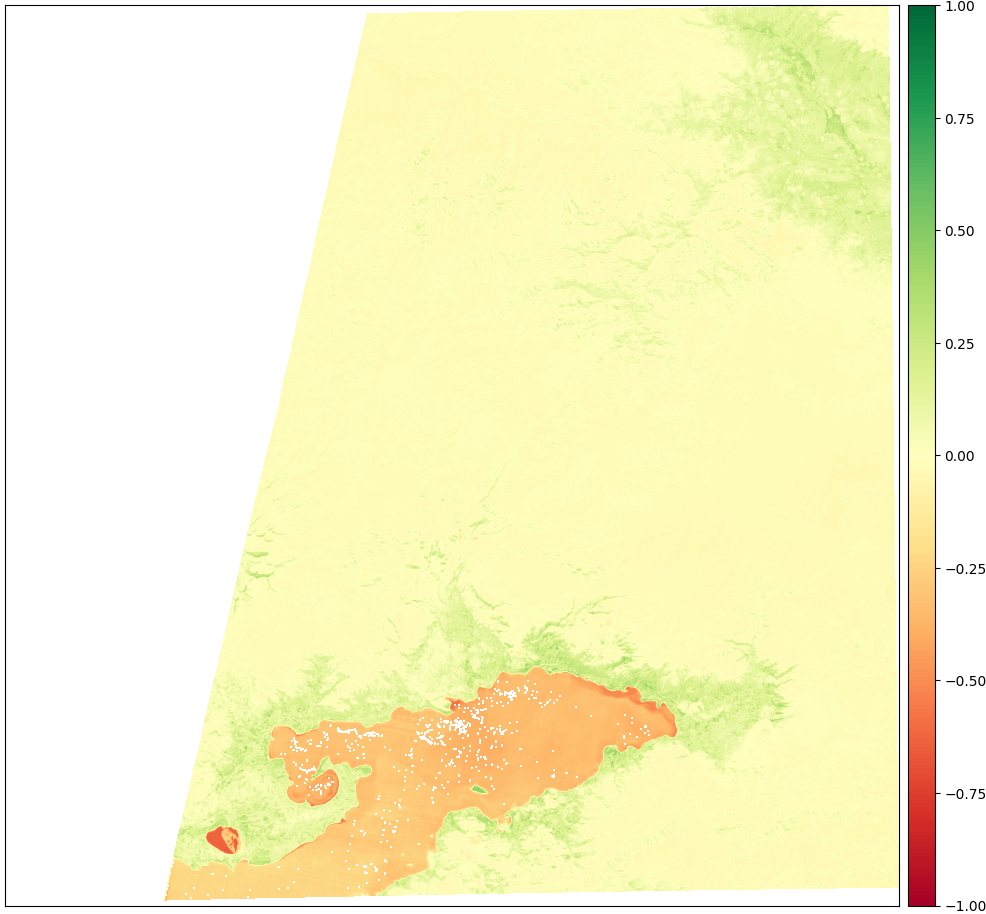
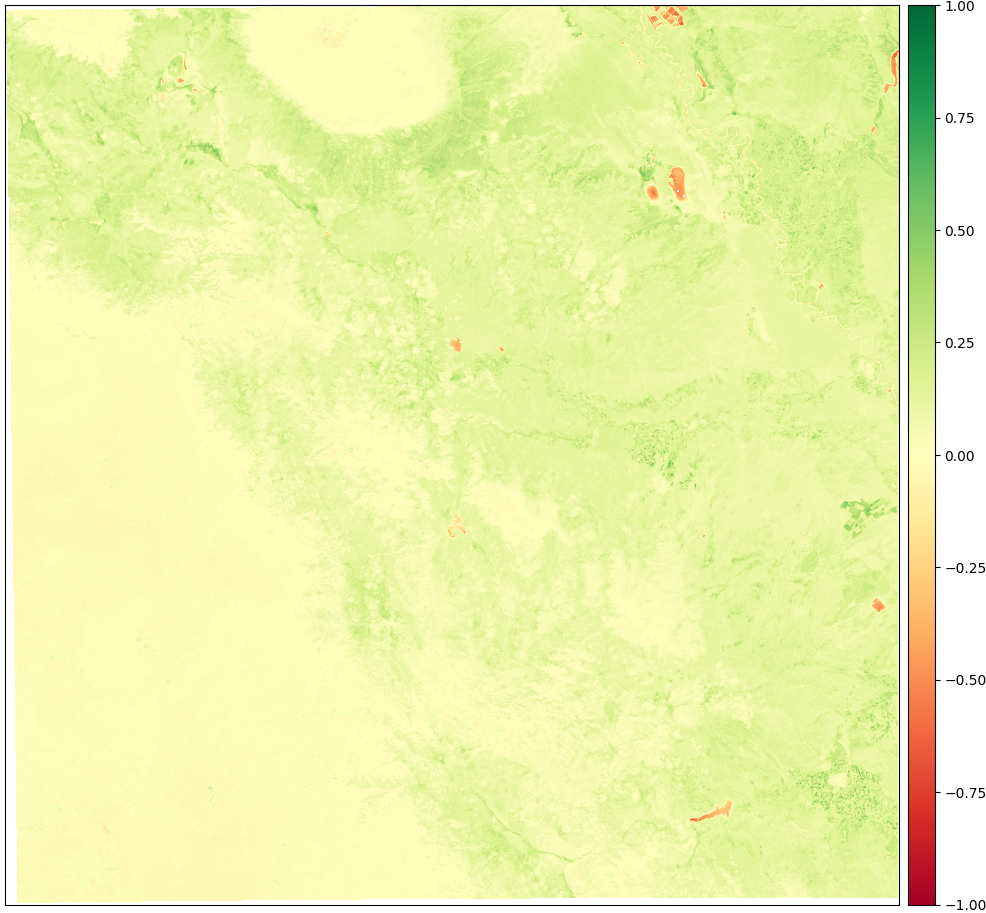
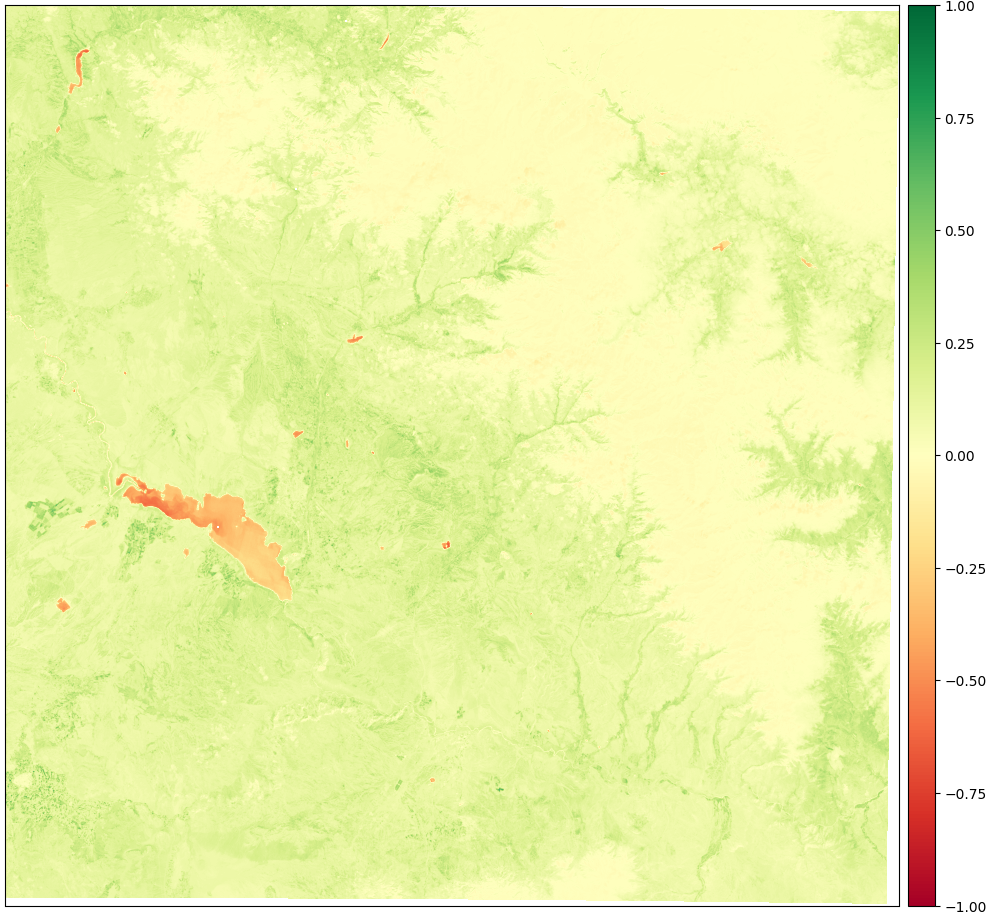
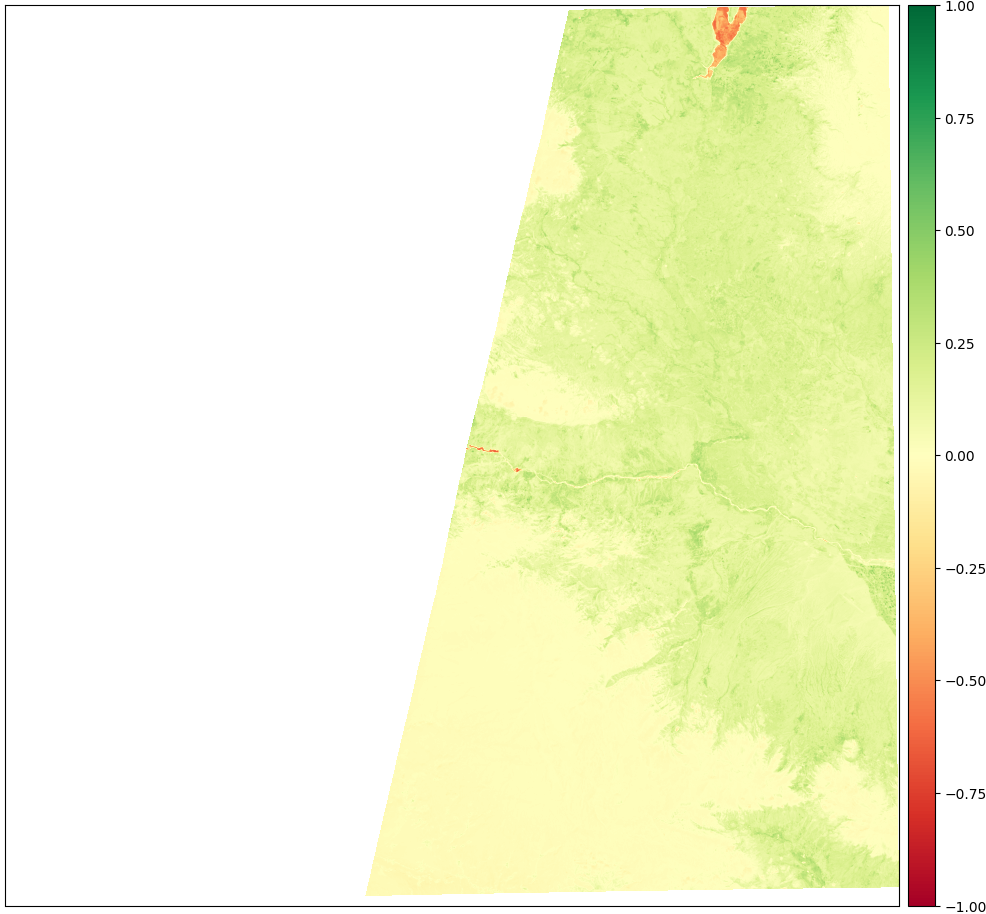
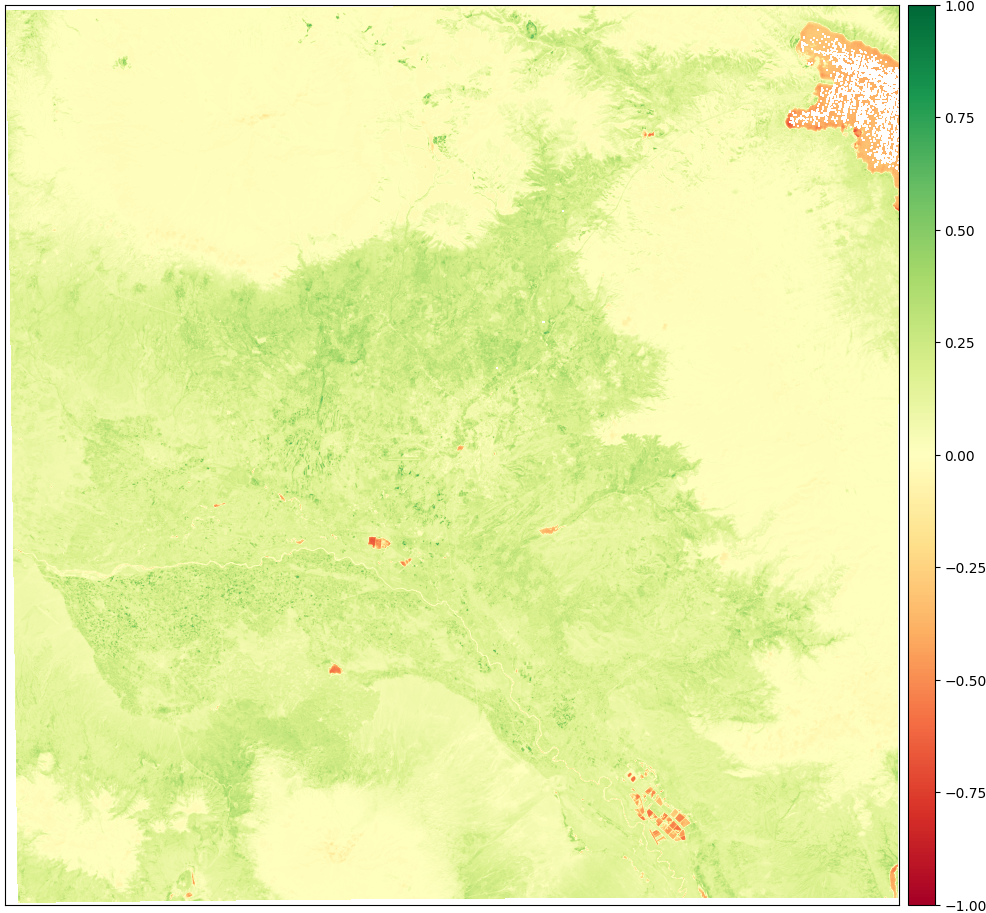
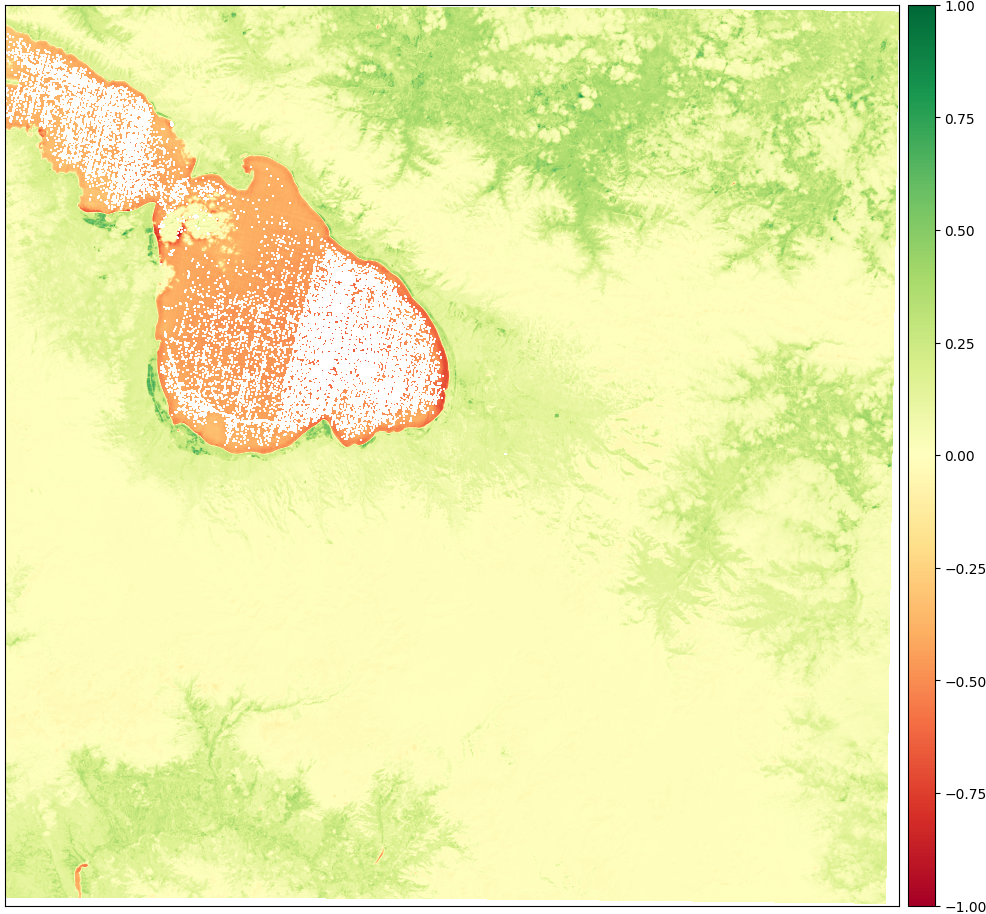
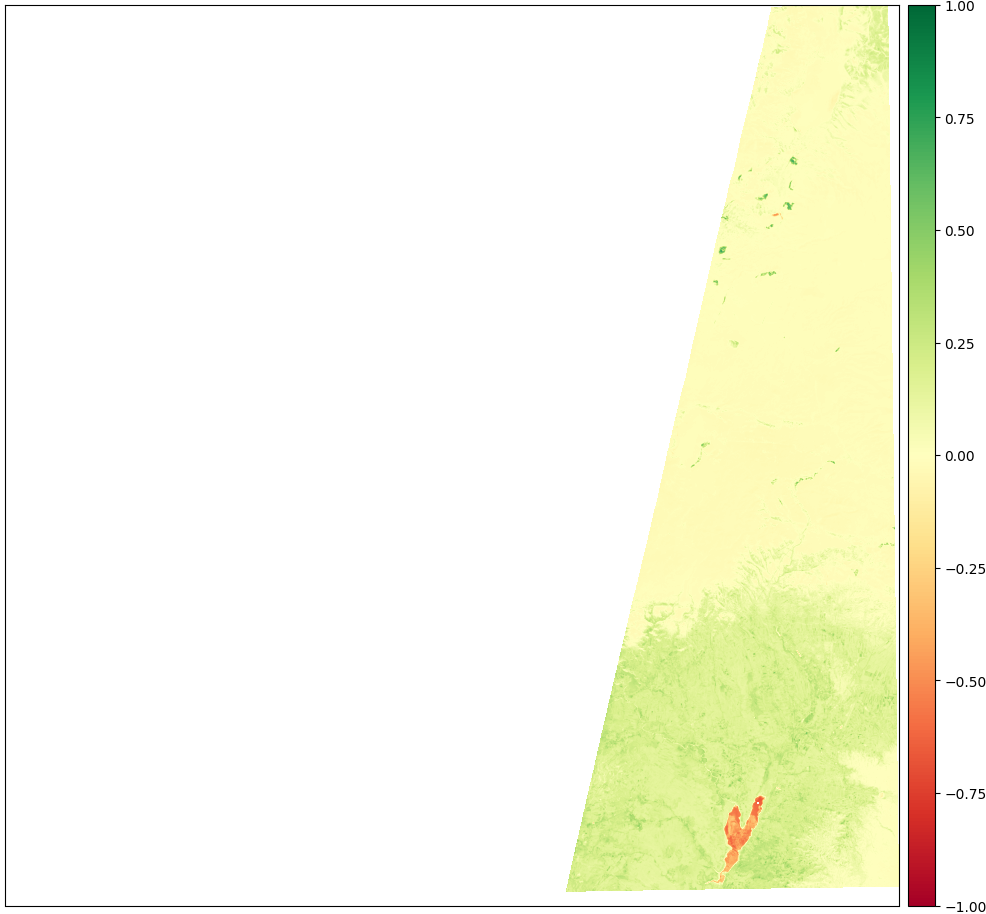
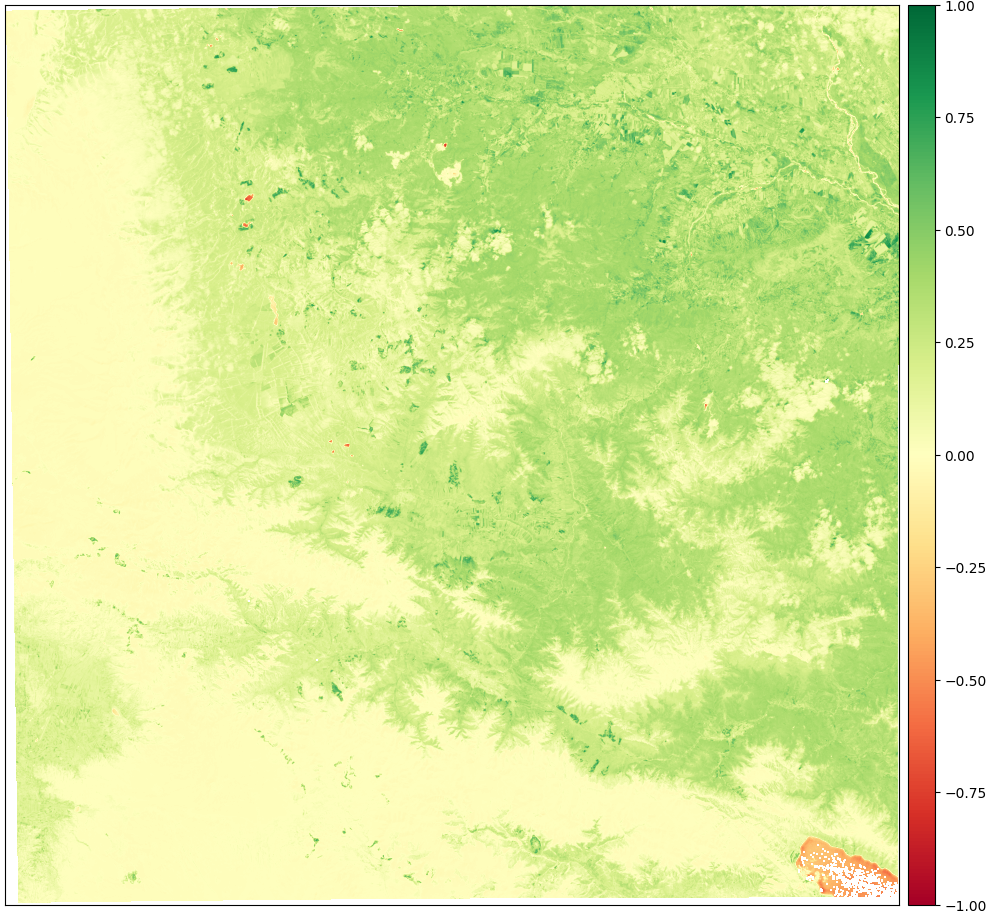
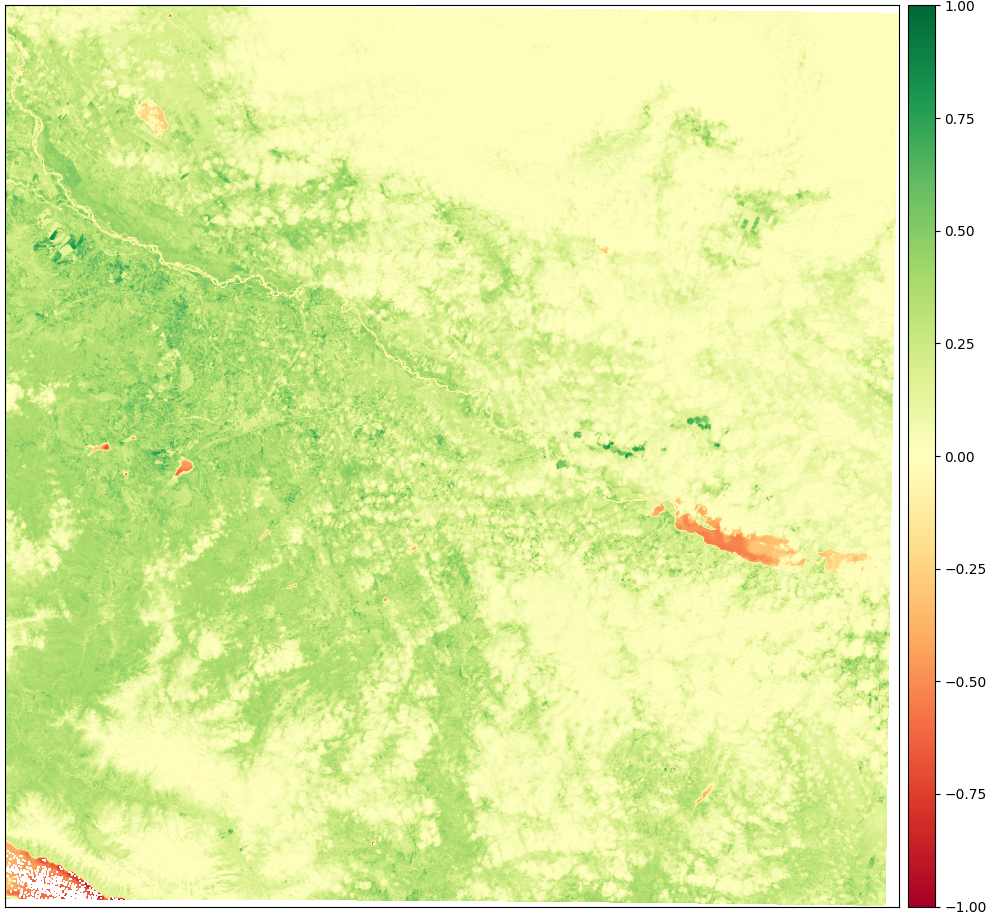
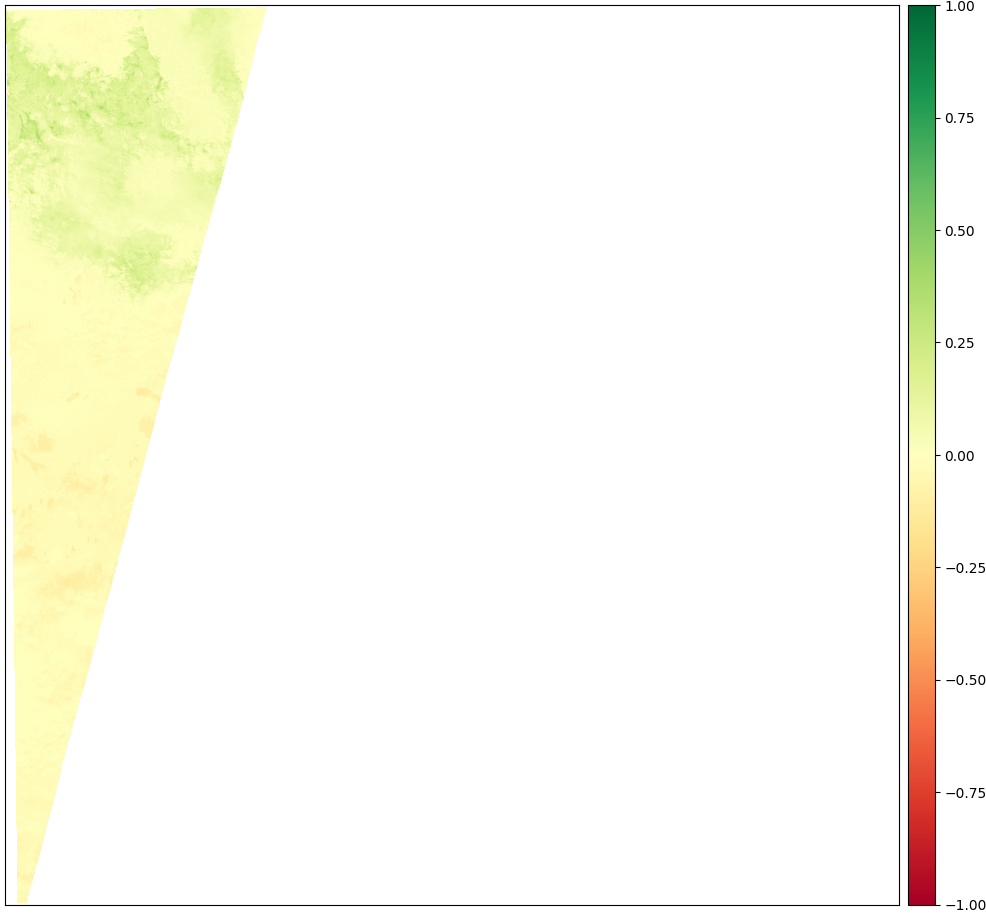
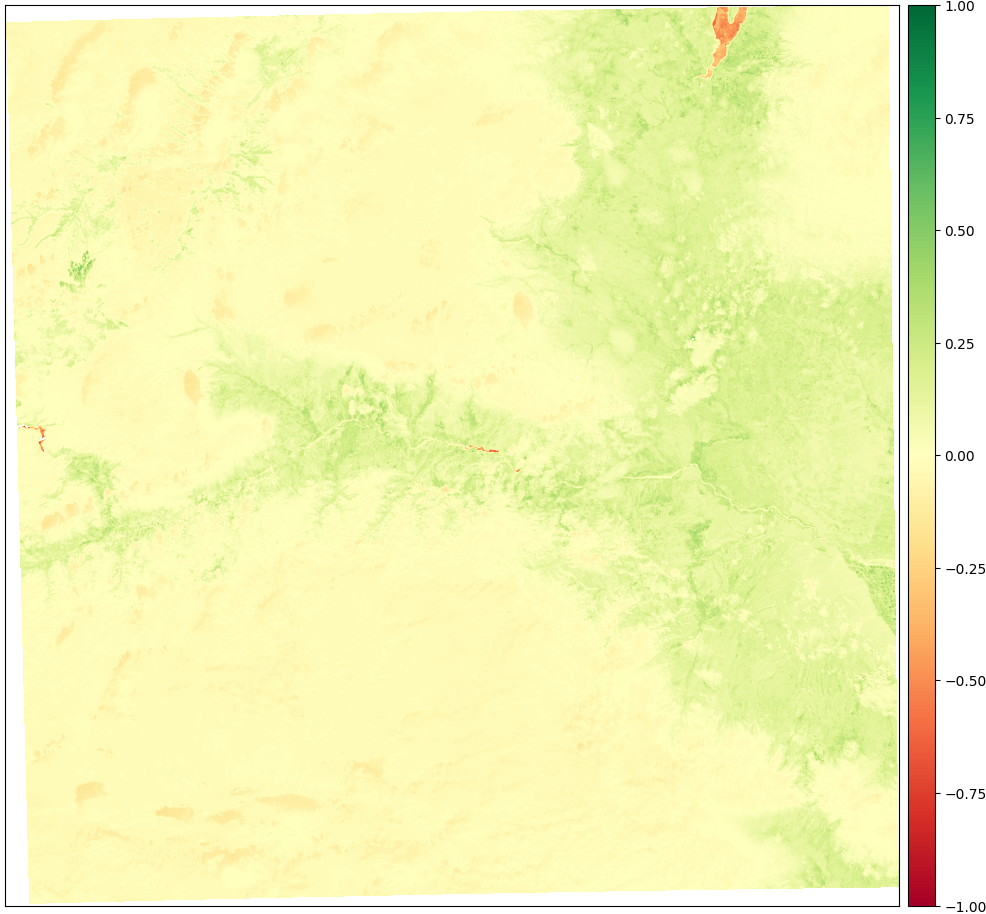
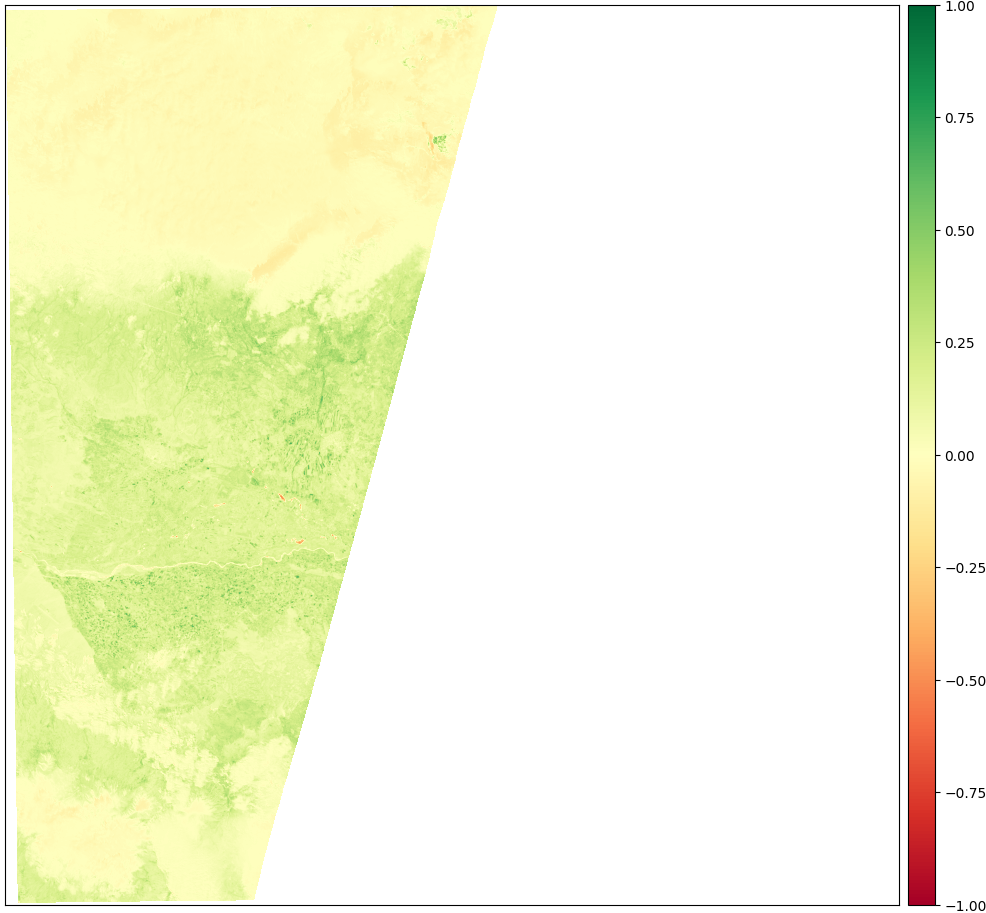
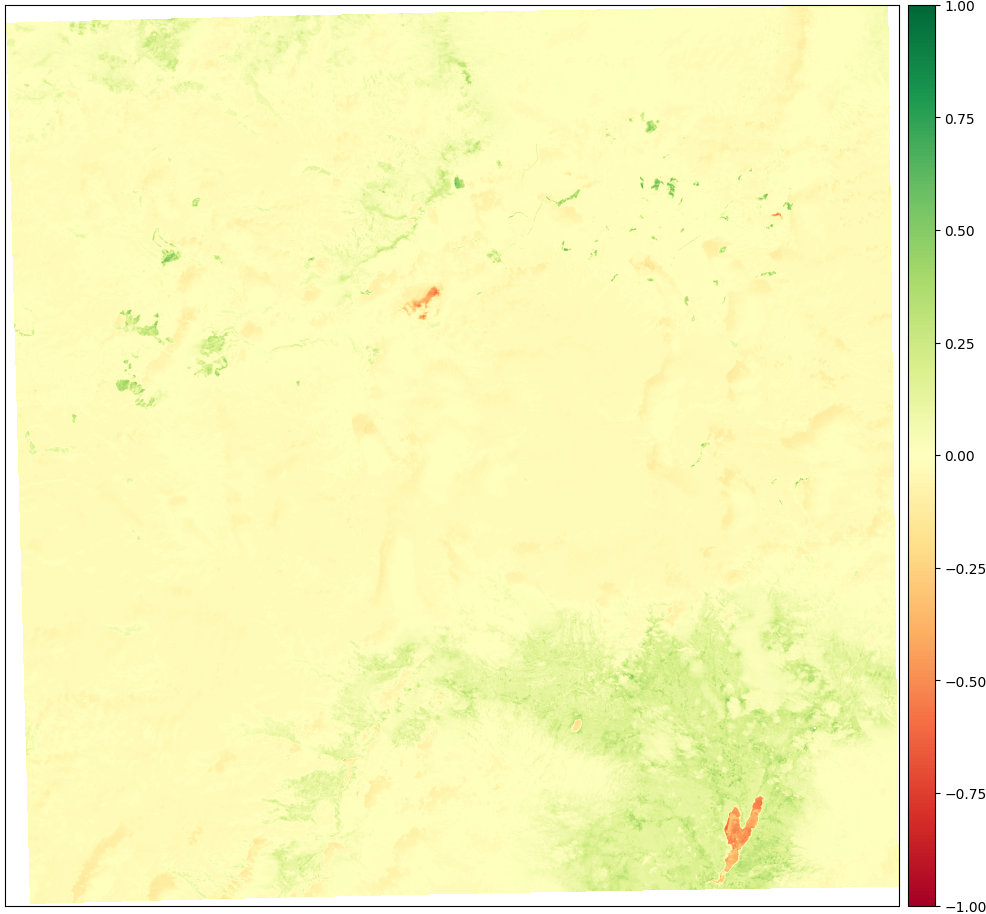

In [ ]:
visualize()